In [6194]:
import pandas as pd 
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [6195]:
df = pd.read_csv('Boston.csv')

In [6196]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6197]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6198]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Correlación variables

<Axes: >

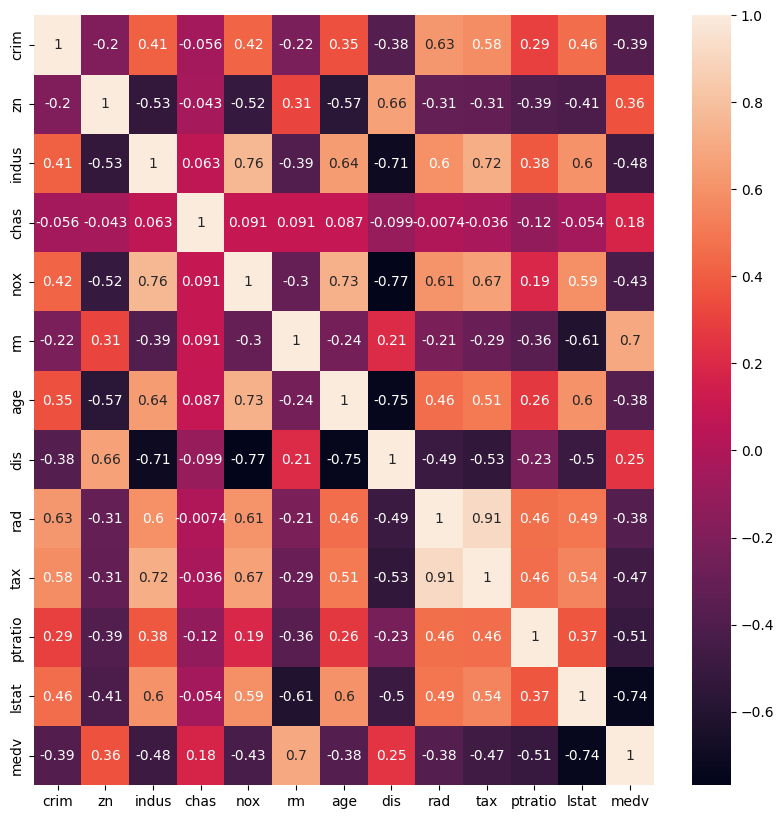

In [6199]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [6200]:
target = 'medv'
y = df[target]

In [6201]:
df = pd.get_dummies(df,columns=['rad'])

In [6202]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,False,False,True,False,False,False,False,False,False


In [6203]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones':predicciones,
        'y':y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False)+1
    grouped = df_calibracion.groupby('bins').mean()

    plt.plot(grouped.predicciones, grouped.y, label="Modelo", marker="o")
    plt.plot(grouped.predicciones, grouped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

# Analisis Bivariado

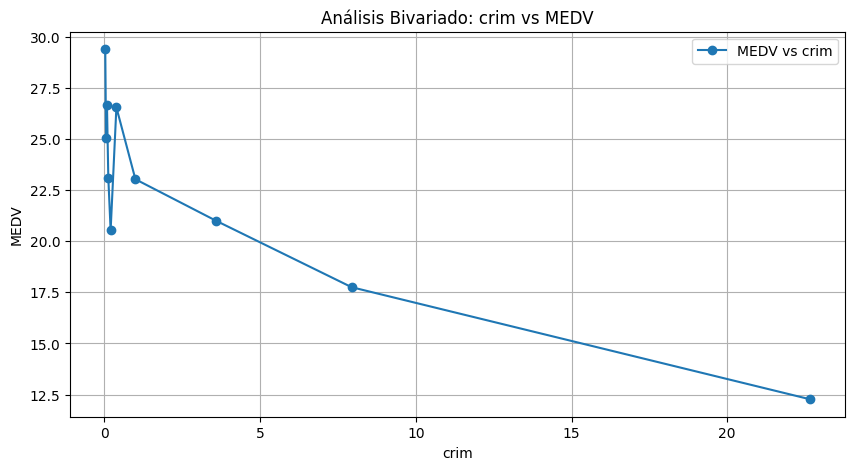

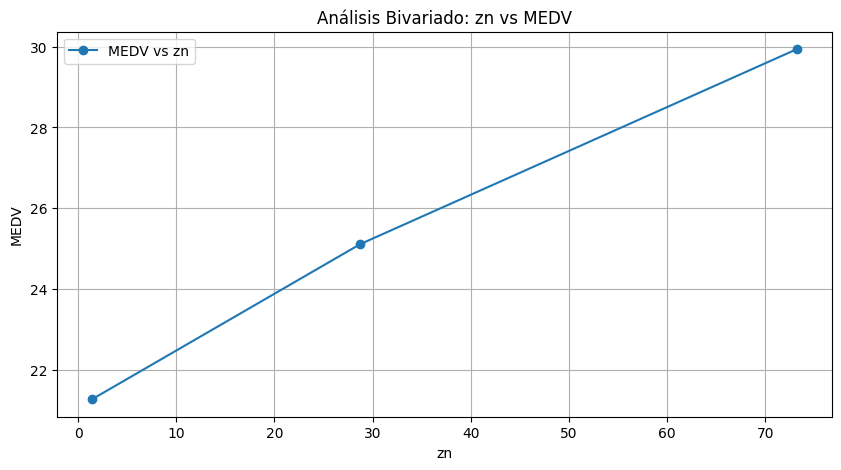

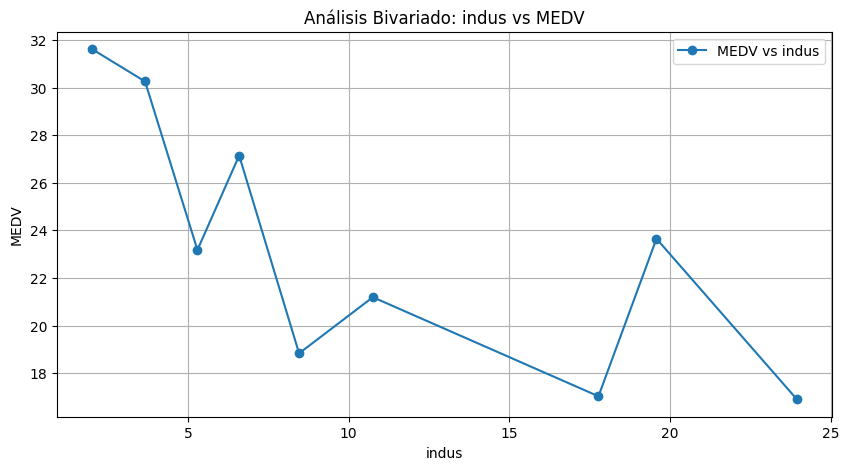

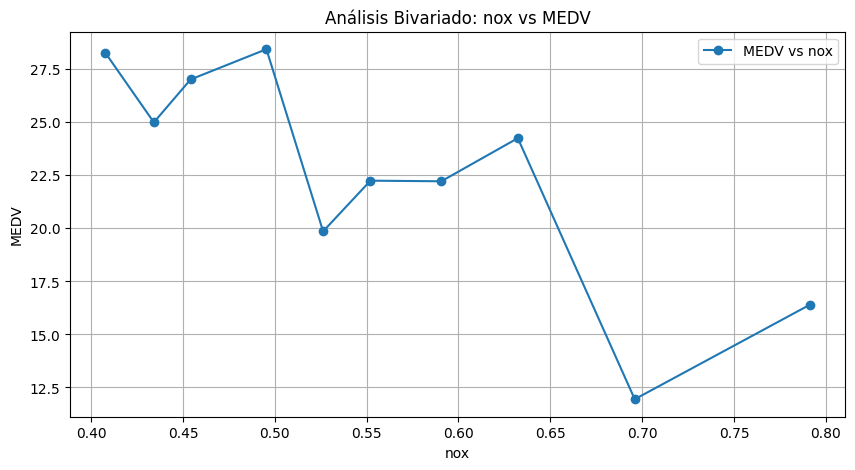

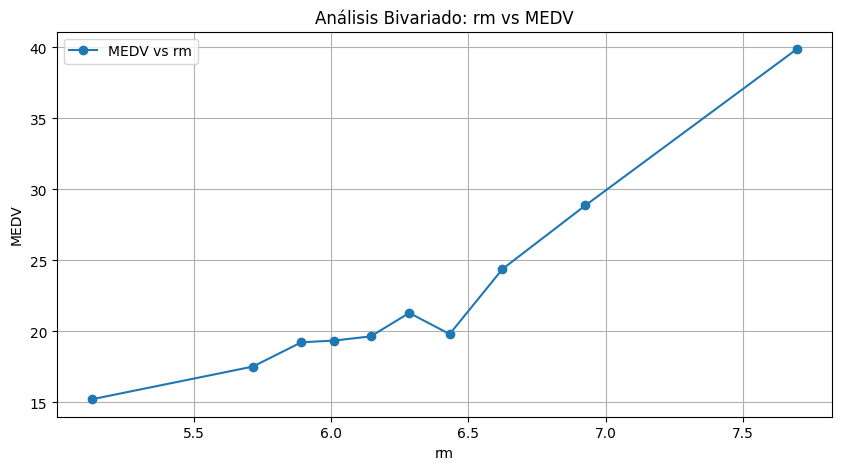

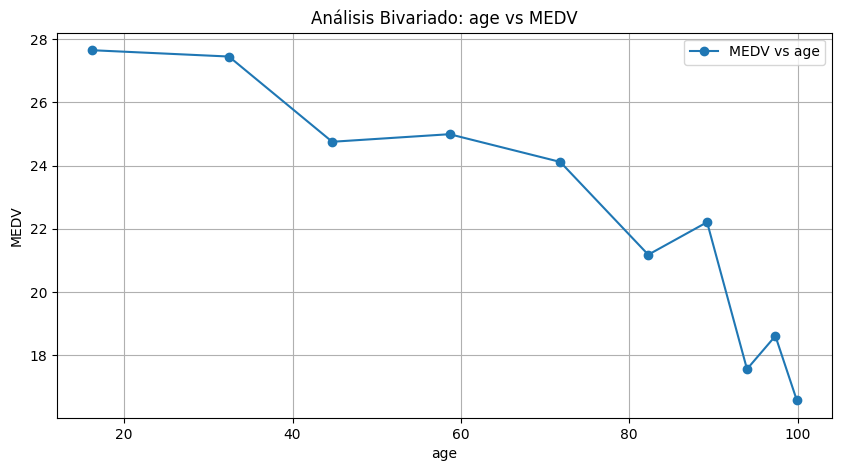

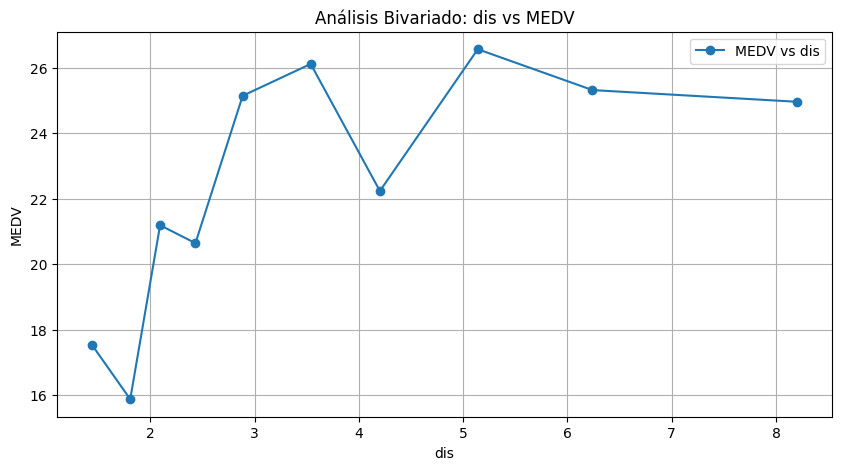

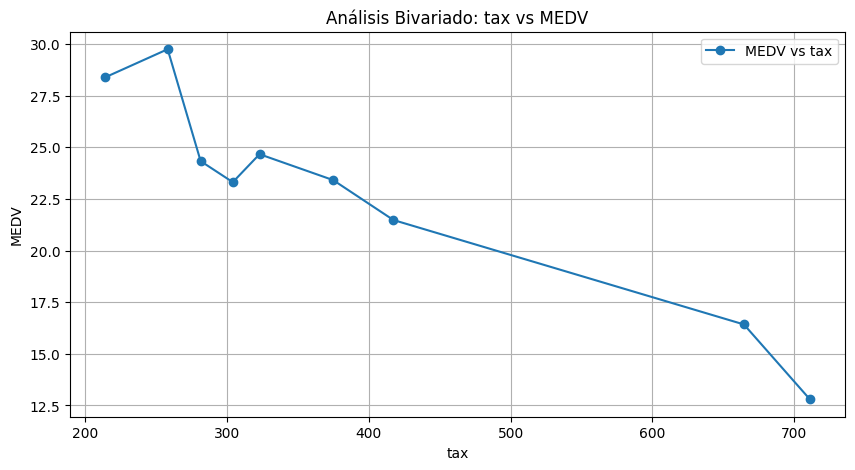

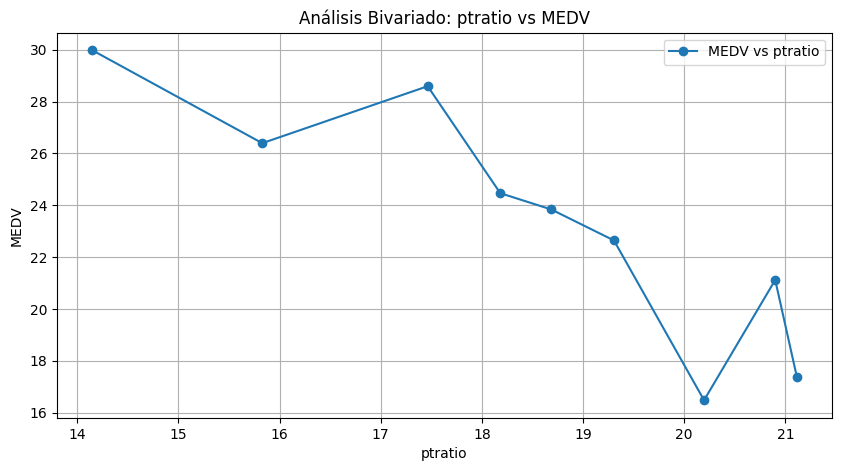

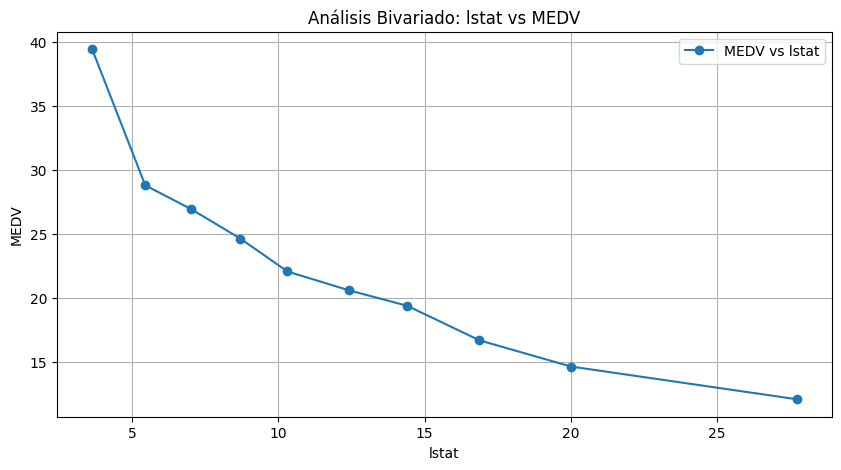

In [6204]:
variables = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']

for i in variables:
    variable_bin = f'{i}_bin'
    df[variable_bin] = pd.qcut(df[i], q=10, labels=False, duplicates='drop') + 1
    grouped = df.groupby(variable_bin).mean()
    plt.figure(figsize=(10, 5))
    plt.plot(grouped[i].values, grouped[target].values, marker="o", label=f'MEDV vs {i}')
    plt.xlabel(i)
    plt.ylabel('MEDV')
    plt.title(f'Análisis Bivariado: {i} vs MEDV')
    plt.legend()
    plt.grid()
    plt.show()
    df.drop(columns=[variable_bin], inplace=True)




In [6205]:

df.head()


,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,False,False,True,False,False,False,False,False,False


In [6206]:
X = df.copy()
X = X.drop(target, axis=1)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,lstat,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,4.98,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,9.14,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,4.03,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,2.94,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,5.33,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,9.67,True,False,False,False,False,False,False,False,False
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,9.08,True,False,False,False,False,False,False,False,False
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,5.64,True,False,False,False,False,False,False,False,False
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,6.48,True,False,False,False,False,False,False,False,False


# RLM con todas las variables 

In [6207]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state = 42)

model = linear_model.LinearRegression().fit(X_train, y_train)

predicciones_lineal=model.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.7211432830626587

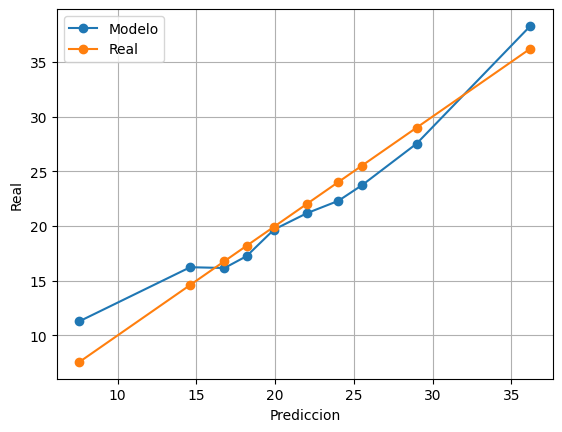

In [6208]:
calibracion(predicciones_lineal, y_test, 10)

# Polinomial Grado 2 con todas las variables

In [6209]:
degree = 2

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Ridge().fit(X_train, y_train)

 
predicciones_poly2= model.predict(X_test)
r2_score(y_pred=predicciones_poly2, y_true=y_test)

0.8121940246948067

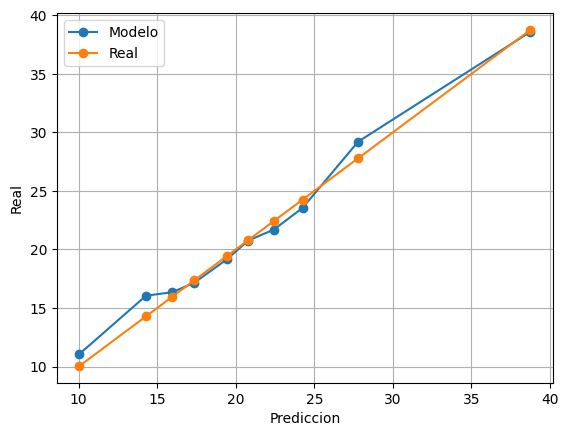

In [6210]:
calibracion(predicciones_poly2, y_test, 10)

# Polinomial Grado 3 con todas las variables

In [6211]:
degree = 3

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Lasso().fit(X_train, y_train)

 
predicciones_poly3= model.predict(X_test)
r2_score(y_pred=predicciones_poly3, y_true=y_test)

0.728675493313274

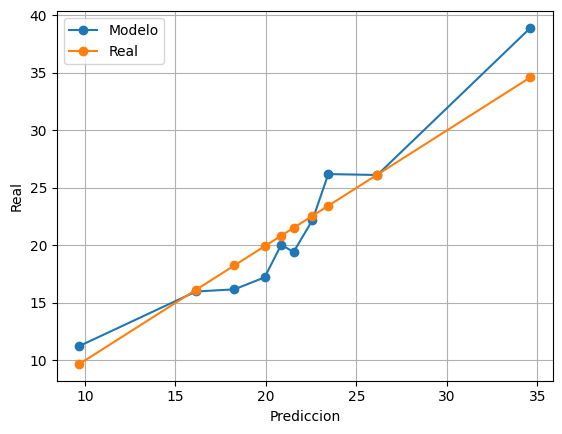

In [6212]:
calibracion(predicciones_poly3, y_test, 10)

In [6213]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,False,False,True,False,False,False,False,False,False


# Revisar la significancia de las variables

In [6214]:
result = smf.ols('medv ~ ' + '+'.join(df.columns.drop(['medv', 'indus', 'age', 'rad_1', 'rad_6','rad_2'])), data=df).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,41.7323,5.082,8.212,0.000,31.747,51.718
rad_3[T.True],3.6712,0.988,3.716,0.000,1.730,5.613
rad_4[T.True],1.6252,0.758,2.143,0.033,0.135,3.115
rad_5[T.True],1.8333,0.768,2.386,0.017,0.324,3.343
rad_7[T.True],3.9458,1.317,2.995,0.003,1.358,6.534
rad_8[T.True],3.7931,1.173,3.233,0.001,1.488,6.098
rad_24[T.True],6.0159,1.434,4.195,0.000,3.198,8.834
crim,-0.1233,0.033,-3.769,0.000,-0.188,-0.059
zn,0.0533,0.014,3.816,0.000,0.026,0.081
chas,2.6619,0.863,3.085,0.002,0.967,4.357


In [6215]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,False,False,True,False,False,False,False,False,False


In [6216]:
X_multiple = df[['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat', 'rad_3', 'rad_4', 'rad_5', 'rad_7', 'rad_8', 'rad_24']]

In [6217]:
scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)

# RLM con las variables significantes

In [6218]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state = 42)

model = linear_model.Ridge().fit(X_train, y_train)

predicciones_lineal=model.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.7238173788011175

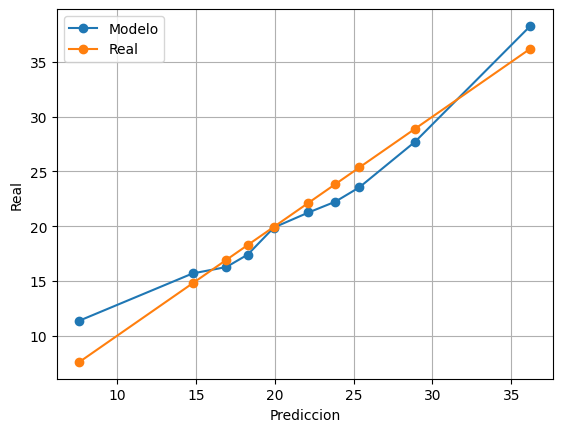

In [6219]:
calibracion(predicciones_lineal, y_test, 10)

# Polinomial Grado 2 con las variables significantes

In [6220]:
degree = 2

scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Ridge().fit(X_train, y_train)

 
predicciones_poly2= model.predict(X_test)
r2_score(y_pred=predicciones_poly2, y_true=y_test)

0.8107558114121797

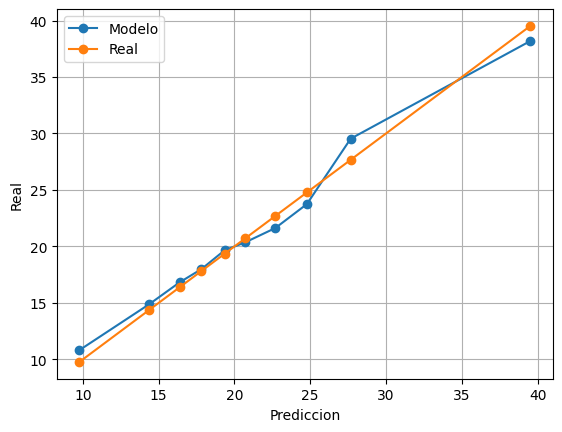

In [6221]:
calibracion(predicciones_poly2, y_test, 10)

# Polinomial Grado 3 con las variables significantes

In [6222]:
degree = 3

scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Lasso().fit(X_train, y_train)

 
predicciones_poly3= model.predict(X_test)
r2_score(y_pred=predicciones_poly3, y_true=y_test)

0.7688308046927306

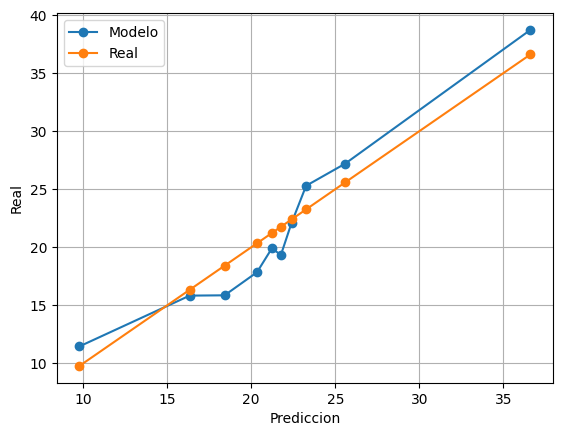

In [6223]:
calibracion(predicciones_poly3, y_test, 10)

# Feature Engineering

In [6224]:
X = df.copy()
X

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,...,22.4,True,False,False,False,False,False,False,False,False
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,...,20.6,True,False,False,False,False,False,False,False,False
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,...,23.9,True,False,False,False,False,False,False,False,False
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,...,22.0,True,False,False,False,False,False,False,False,False


# Creacion de variables nuevas

In [6225]:
X['tax_per_nox'] = X['tax'] / X['nox']
X['age_per_nox'] = X['age'] / X['nox']
X['zn_per_dis'] = X['zn'] / X['dis']
X['crim_per_age'] = X['crim'] / X['age']
X['lstat_per_age'] = X['lstat'] / X['age']
X['tax_per_dis'] = X['tax'] / X['dis']
X['crim_per_indus'] = X['crim'] / X['indus']

X['age_2'] =X['age']**2
X['log_nox'] = np.log(X['nox'])
X['log_dis'] = np.log(X['dis'])
X['log_rm'] = np.log(X['rm'])
X




,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,age_per_nox,zn_per_dis,crim_per_age,lstat_per_age,tax_per_dis,crim_per_indus,age_2,log_nox,log_dis,log_rm
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,121.189591,4.400978,0.000097,0.076380,72.371638,0.002736,4251.04,-0.619897,1.408545,1.883275
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,168.230277,0.000000,0.000346,0.115843,48.720581,0.003863,6225.21,-0.757153,1.602836,1.859574
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,130.277186,0.000000,0.000447,0.065957,48.720581,0.003860,3733.21,-0.757153,1.602836,1.971996
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,100.000000,0.000000,0.000707,0.064192,36.620369,0.014849,2097.64,-0.780886,1.802073,1.945624
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,118.340611,0.000000,0.001274,0.098339,36.620369,0.031674,2937.64,-0.780886,1.802073,1.966693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,...,120.593368,0.000000,0.000906,0.139942,110.142823,0.005250,4774.81,-0.556870,0.907694,1.886008
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,...,133.856894,0.000000,0.000590,0.118383,119.344262,0.003795,5882.89,-0.556870,0.827460,1.811562
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,...,158.813264,0.000000,0.000668,0.061978,125.951557,0.005093,8281.00,-0.556870,0.773574,1.942476
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,...,155.846422,0.000000,0.001227,0.072564,114.278538,0.009186,7974.49,-0.556870,0.870833,1.916040


In [6226]:
result = smf.ols('medv ~ ' + '+'.join(X.columns.drop(['medv'])), data=X).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,208.6442,23.447,8.899,0.000,162.571,254.717
rad_1[T.True],20.2087,2.693,7.503,0.000,14.916,25.501
rad_2[T.True],21.4257,2.777,7.714,0.000,15.968,26.883
rad_3[T.True],24.6688,2.771,8.903,0.000,19.224,30.114
rad_4[T.True],22.9695,2.687,8.548,0.000,17.690,28.249
rad_5[T.True],22.7962,2.553,8.931,0.000,17.780,27.812
rad_6[T.True],21.9259,2.624,8.357,0.000,16.770,27.082
rad_7[T.True],24.0025,2.838,8.457,0.000,18.426,29.579
rad_8[T.True],22.9556,2.731,8.407,0.000,17.590,28.321
rad_24[T.True],27.6913,2.987,9.271,0.000,21.822,33.560


# Analisis Bivariado con variables creadas agregadas al dataset

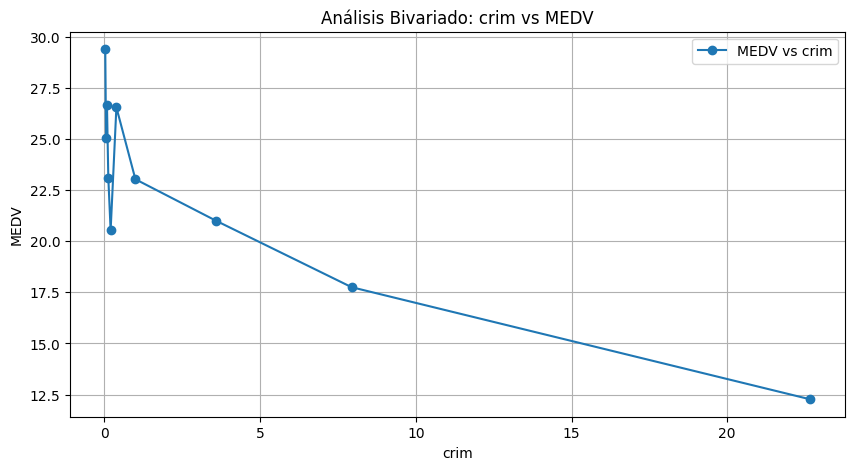

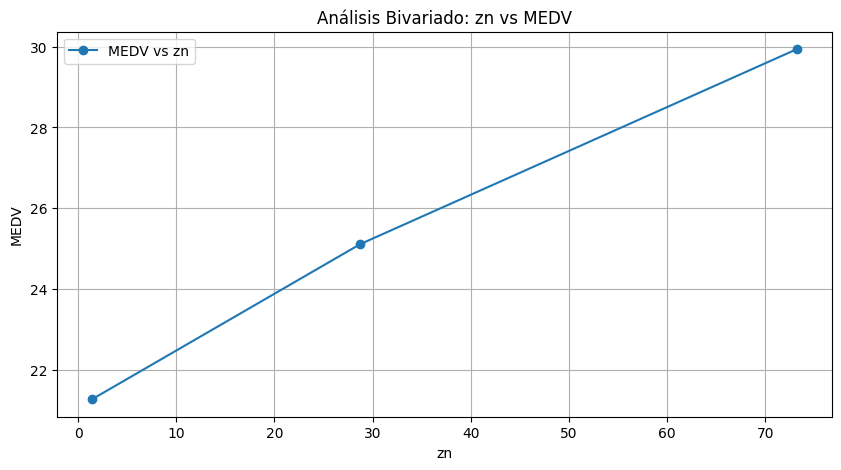

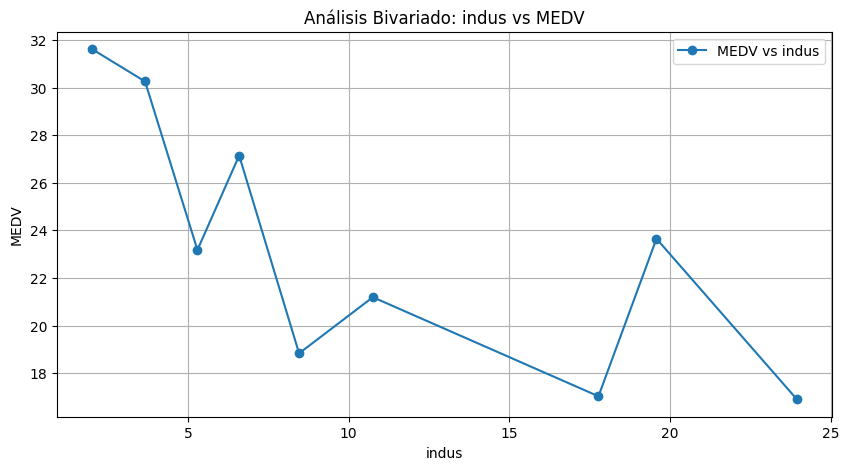

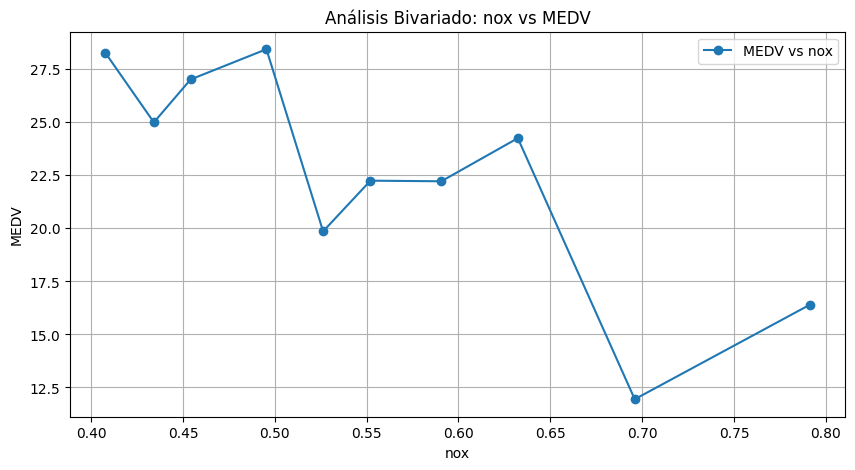

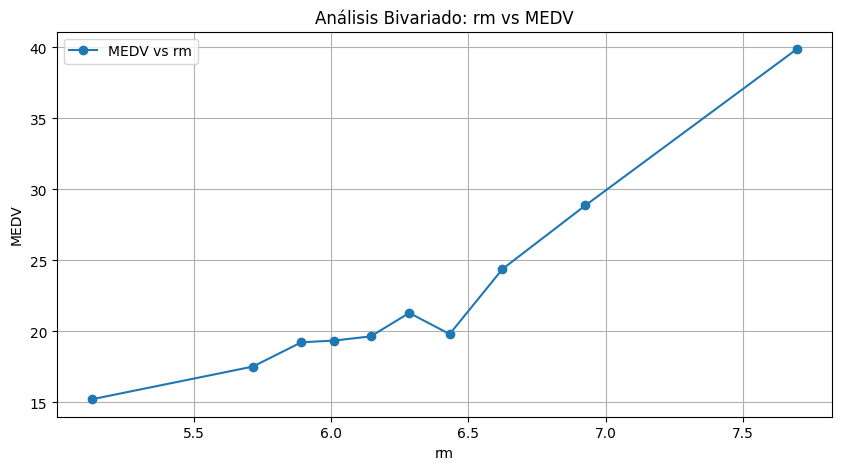

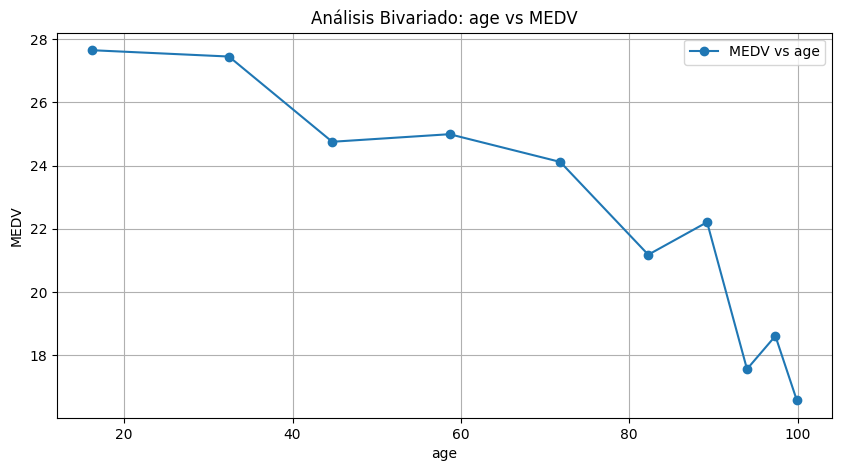

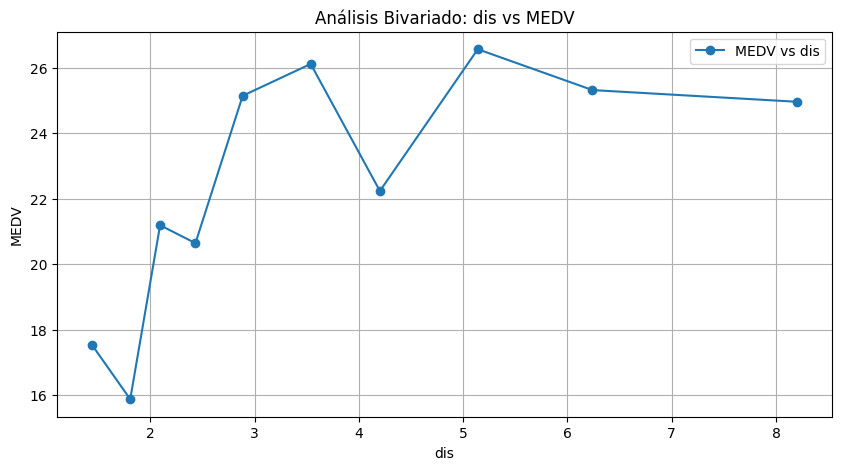

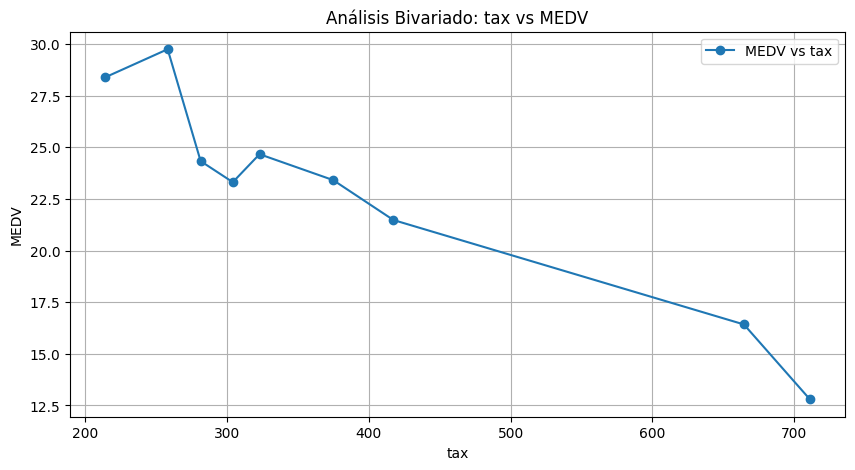

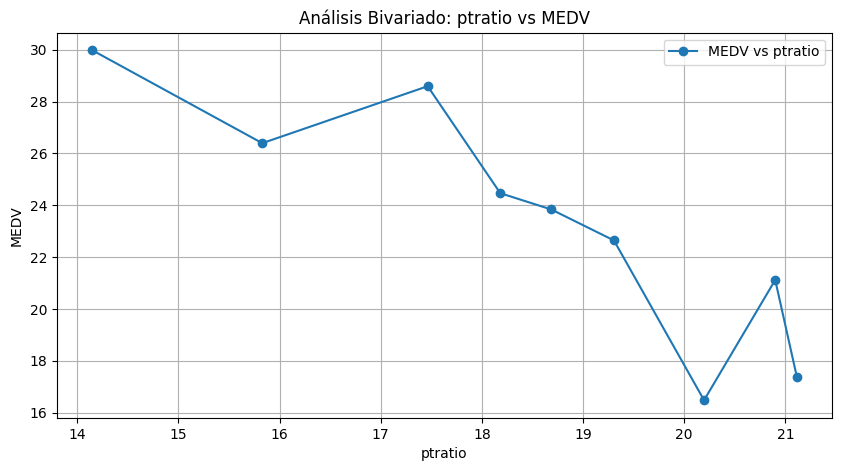

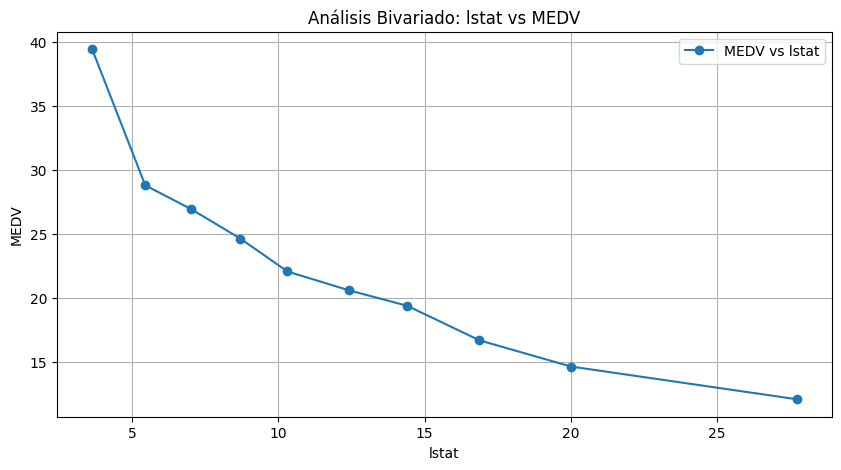

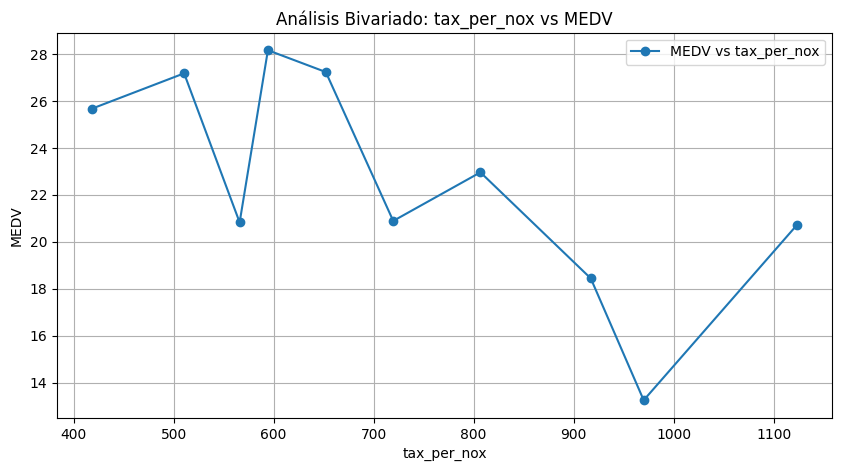

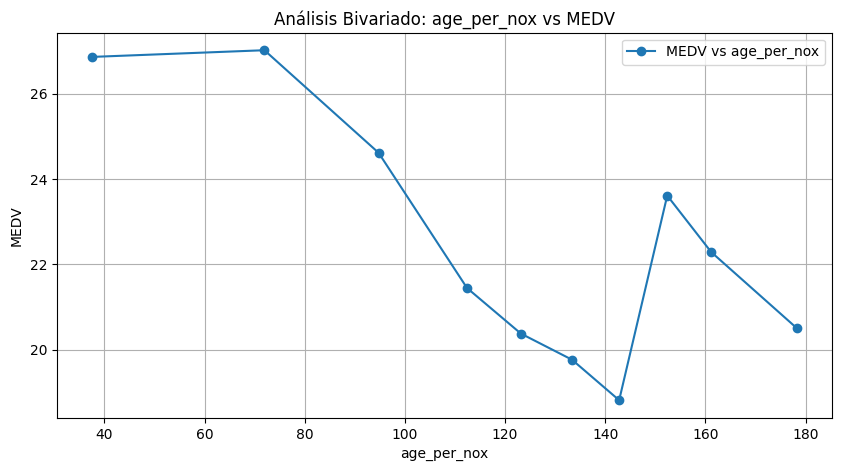

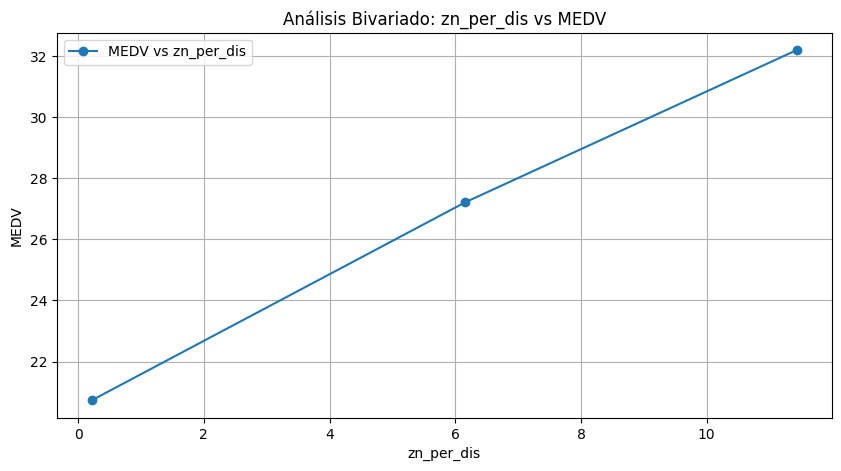

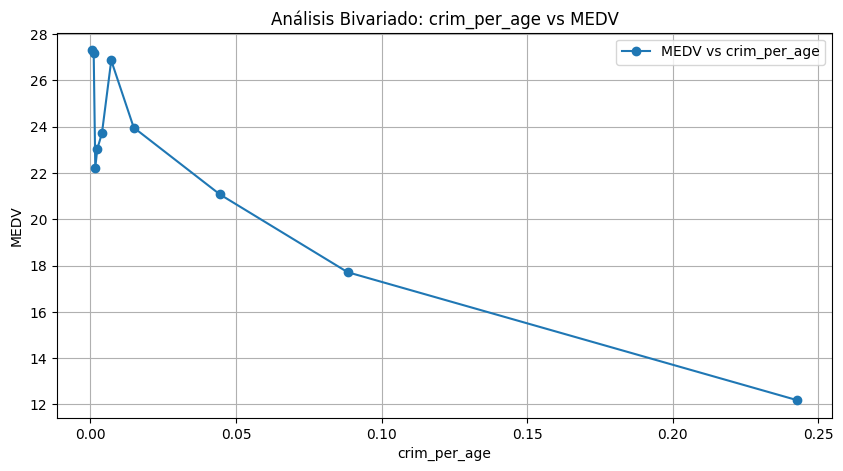

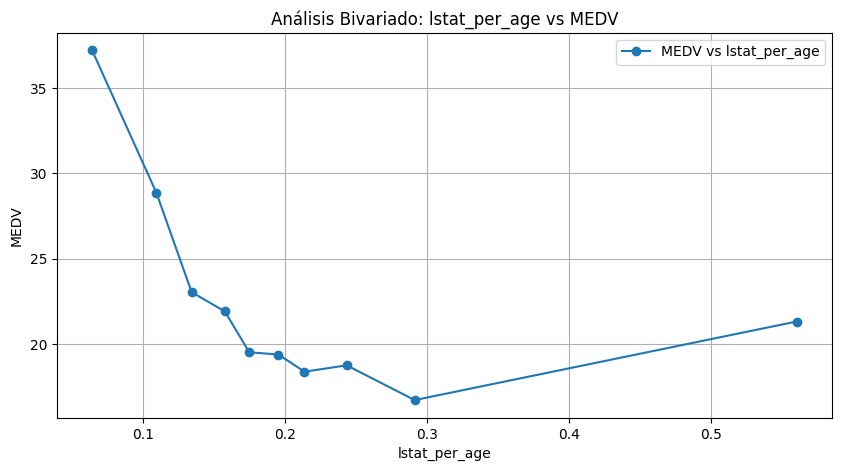

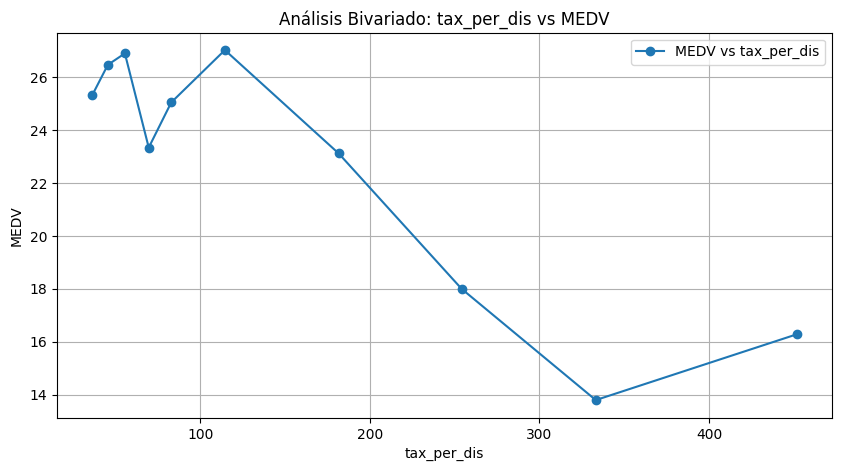

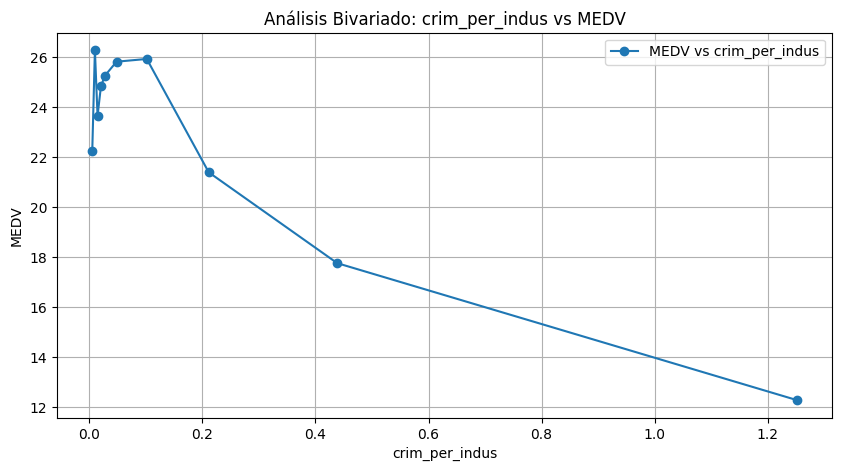

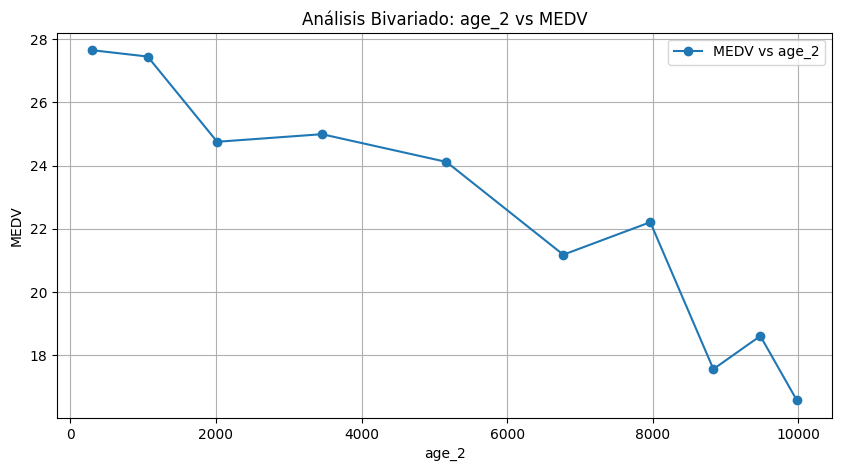

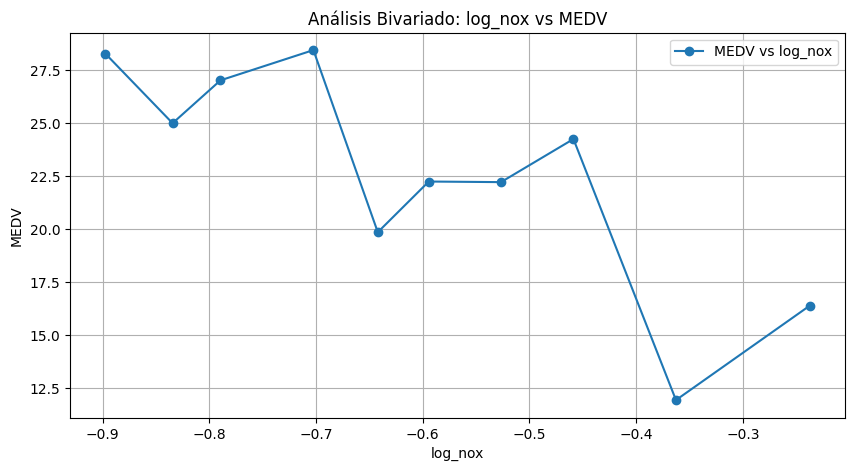

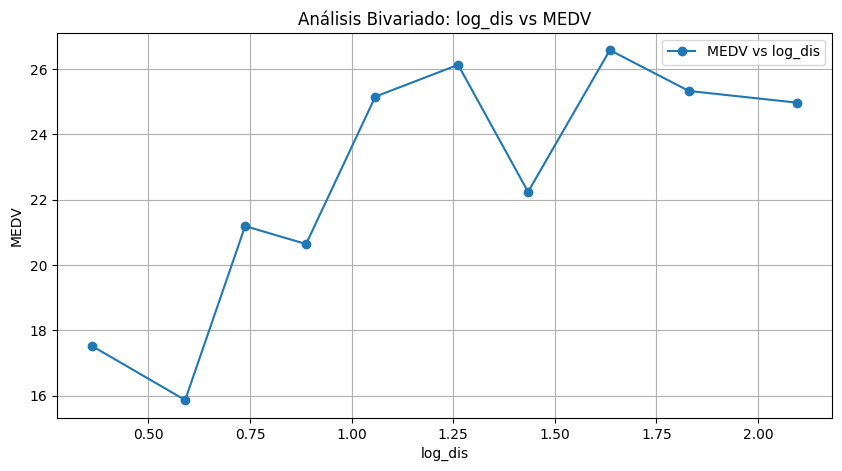

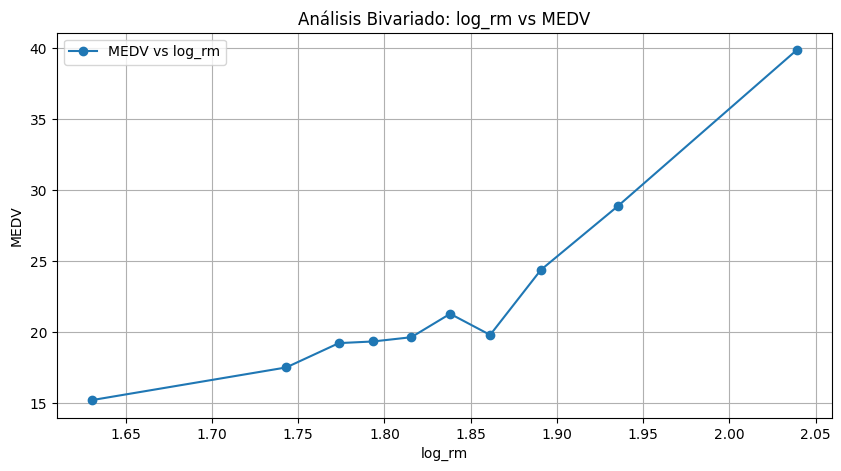

In [6227]:
variables = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat', 'tax_per_nox', 'age_per_nox', 'zn_per_dis', 'crim_per_age', 'lstat_per_age', 'tax_per_dis', 'crim_per_indus', 'age_2', 'log_nox', 'log_dis', 'log_rm']

for i in variables:
    variable_bin = f'{i}_bin'
    X[variable_bin] = pd.qcut(X[i], q=10, labels=False, duplicates='drop') + 1
    grouped = X.groupby(variable_bin).mean()
    plt.figure(figsize=(10, 5))
    plt.plot(grouped[i].values, grouped[target].values, marker="o", label=f'MEDV vs {i}')
    plt.xlabel(i)
    plt.ylabel('MEDV')
    plt.title(f'Análisis Bivariado: {i} vs MEDV')
    plt.legend()
    plt.grid()
    plt.show()
    X.drop(columns=[variable_bin], inplace=True)

In [6228]:
X = X.copy().drop(target, axis=1)


# RLM con variables creadas agregadas al dataset

In [6229]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = linear_model.Ridge().fit(X_train, y_train)

predicciones_lineal = model.predict(X_test)
r2_score(y_true=y_test, y_pred=predicciones_lineal)

0.7300974364626285

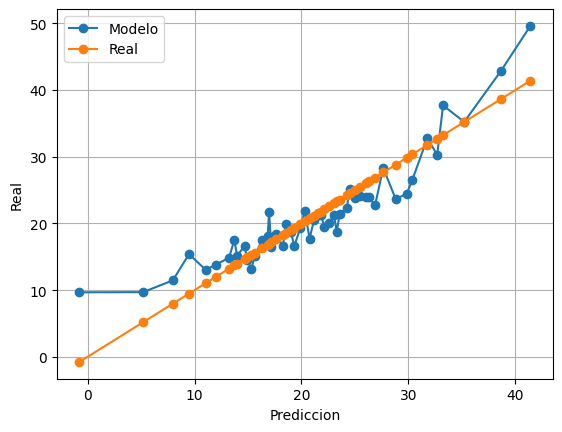

In [6230]:
calibracion(predicciones_lineal, y_test, 50)

# Polinomial Grado 2 con variables creadas agregadas al dataset

In [6231]:
degree = 2

# Aplicar StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

#Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly2_fe= model.predict(X_test)
r2_score(y_pred=predicciones_poly2_fe, y_true=y_test)

0.8986782373455686

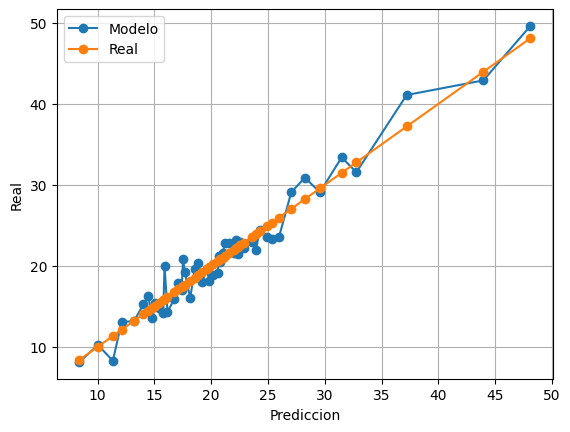

In [6232]:
calibracion(predicciones_poly2_fe, y_test, bins=50)

# Polinomial Grado 3 con variables creadas agregadas al dataset

In [6233]:

degree = 3

# Aplicar StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

#Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly3_fe= model.predict(X_test)
r2_score(y_pred=predicciones_poly3_fe, y_true=y_test)

0.7580442399671176

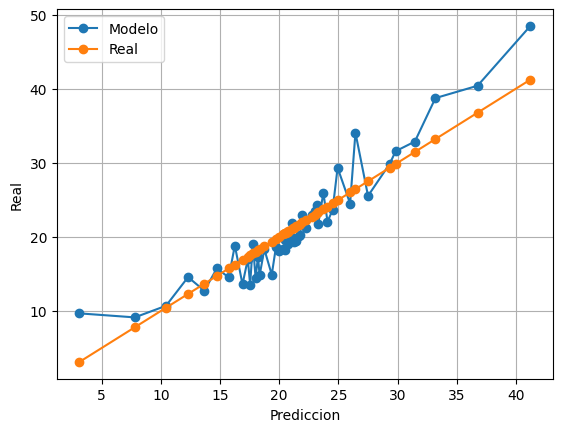

In [6234]:
calibracion(predicciones_poly3_fe, y_test, bins=50)

# KNN

In [6235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6236]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor().fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)

r2_score(y_pred=predicciones, y_true=y_test)

0.6294206329902967

In [6237]:
nn = []
r2 = []
r2_train = []
for i in range(1,50):
    model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)
    r2.append(r2_score(y_pred=predicciones, y_true=y_test))
    nn.append(i)
    predicciones_train = model.predict(X_train_scaled)
    r2_train.append(r2_score(y_pred=predicciones_train, y_true=y_train))

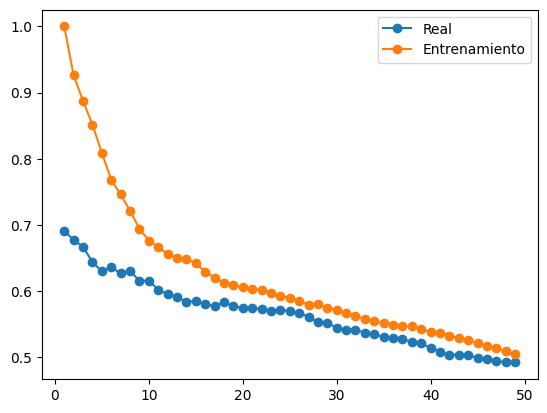

In [6238]:
resultados = pd.DataFrame({
    'nn': nn,
    'r2': r2,
    'r2_train': r2_train
})

plt.plot(resultados.nn, resultados.r2, marker = 'o', label = "Real")
plt.plot(resultados.nn, resultados.r2_train, marker = 'o', label = "Entrenamiento")
plt.legend()

In [6239]:
vecinos_optimos = resultados[resultados.r2 == max(resultados.r2)].nn.values[0]
vecinos_optimos

np.int64(1)

In [6240]:
model = KNeighborsRegressor(n_neighbors=vecinos_optimos).fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)
r2_score(y_pred=predicciones, y_true=y_test)

0.6905100713394092

# Conclusiones

En conclusion podemos ver que al hacer el modelo inicial con todas las variables el mejor es el polinomial de grado 2 utilizando Ridge con un r2 de 0.8121, al revisar la signficancia de las variables y eliminar las que tienen un p-value del 0.05 notamos que el mejor r2 nuevamente es el polinomial de grado 2 utilizando Ridge con un r2 de 0.8107, es interesante ver como al eliminar las variables que no son significantes para el modelo el r2 baja, aunque en este caso en particular lo que se esta buscando es el mejor r2 posible para el modelo. Lo que hizo que el r2 del modelo subiera bastante fue aplicar feature engineering, de acuerdo a la matriz de correlación se crearon nuevas variables y fueron agregadas al dataset original, como ya se menciono la intención era encontrar el r2 mas alto sin importar la significancia de cada coeficiente, utilizando las variables nuevas el r2 aumento hasta 0.8986 dando la mejor explicacion de la variabilidad de los datos con un 89.86% utilizando Ridge en una polinomial de grado 2, podemos notar que en las tres instancias el mejor modelo fue el polinomial de grado 2 utilizando Ridge. Por último en el KNN nos dice que el r2 usando KNeighbors es de 0.6294 y dandonos un numero de vecinos optimos de solamente 1 vecino.